<a href="https://colab.research.google.com/github/currencyfxjle/Solucion_Reto_SC_63_-JoseA_LizarragaEsquer-.ipynb/blob/main/Solucion_Reto_SC_63_%3CJoseA_LizarragaEsquer%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Cargar los datos del archivo proporcionado
file_path = '/content/bank_marketing_RETO_DS_AS.csv'
data = pd.read_csv(file_path)

# Visualizar las primeras filas de los datos para entender su estructura
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None

Missing Values in Each Column:
age          0
job          0
marital      

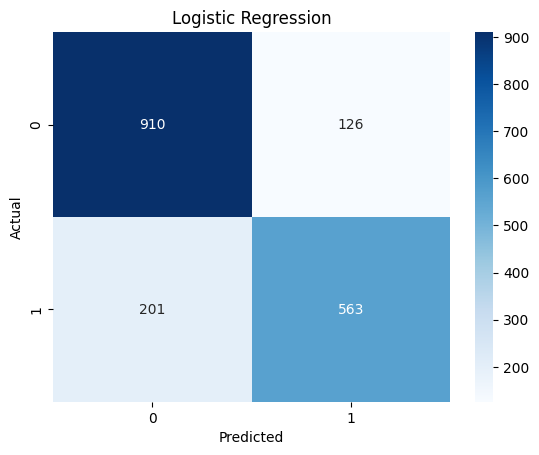

Matriz de Confusión para Red Neuronal:


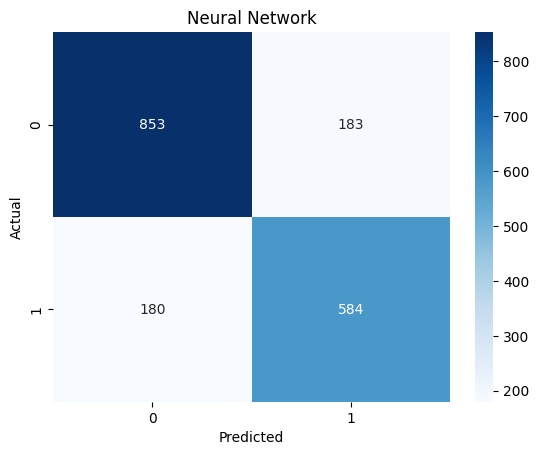

Rendimiento del Modelo Final en el Conjunto de Prueba:


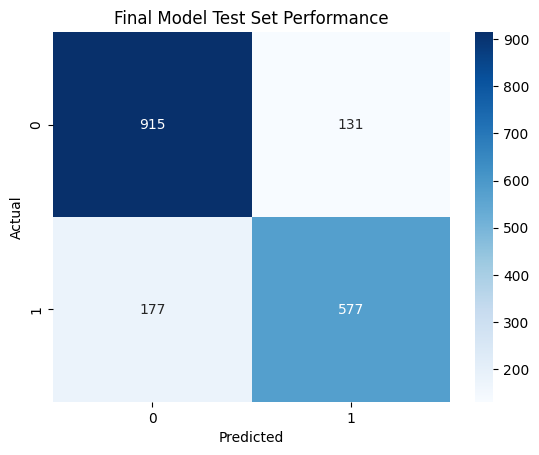

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load the dataset
file_path = '/content/bank_marketing_RETO_DS_AS.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display missing values in each column
print("\nMissing Values in Each Column:")
print(data.isna().sum())

# Transformación de variables categóricas
categorical_features = data.select_dtypes(include=['object']).drop(['y'], axis=1).columns
ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(data[categorical_features]).toarray(), columns=ohe.get_feature_names_out(categorical_features))
data = data.join(ohe_data)
data.drop(categorical_features, axis=1, inplace=True)

# Convierte todos los nombres de las columnas a string para evitar problemas con scikit-learn
data.columns = data.columns.astype(str)

# Transformación de variables numéricas con sesgo
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Definir target variable 'y' y feature variables
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_val_lr = lr_model.predict(X_val)

# Evaluate Logistic Regression Model
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_val, y_pred_val_lr))

# Neural Network Model
# La advertencia "ConvergenceWarning" que estás viendo en tu código
# se refiere a que el optimizador utilizado en el modelo de Red Neuronal (MLP)
# no ha convergido completamente después de alcanzar el número máximo de iteraciones permitidas (500 iteraciones falla / 1000 aprueba)

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_val_nn = nn_model.predict(X_val)

# Evaluate Neural Network Model
print("\nConfusion Matrix for Neural Network:")
print(confusion_matrix(y_val, y_pred_val_nn))

# Select the best model based on the validation set performance
# For example, if the Neural Network performs better, use it for the final evaluation
final_model = nn_model if nn_model.score(X_val, y_val) > lr_model.score(X_val, y_val) else lr_model
y_pred_test = final_model.predict(X_test)

# Final Evaluation with Test Set
print("\nFinal Model Performance on Test Set:")
print(confusion_matrix(y_test, y_pred_test))

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Visualización de las Matrices de Confusión
print("Matriz de Confusión para Regresión Logística:")
plot_confusion_matrix(confusion_matrix(y_val, y_pred_val_lr), 'Logistic Regression')

print("Matriz de Confusión para Red Neuronal:")
plot_confusion_matrix(confusion_matrix(y_val, y_pred_val_nn), 'Neural Network')

# Visualización del Rendimiento del Modelo en el Conjunto de Prueba
print("Rendimiento del Modelo Final en el Conjunto de Prueba:")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), 'Final Model Test Set Performance')

# Conclusions
# Include your conclusions about the use of AI techniques in marketing problems here


**Comparación de Modelos:** El código selecciona el mejor modelo (ya sea Regresión Logística o Red Neuronal) basado en el rendimiento en el conjunto de validación. En este caso, el modelo de Red Neuronal parece superar ligeramente al modelo de Regresión Logística en términos de precisión.

**Calidad de los datos:** Los datos parecen estar bien limpios y no contienen valores nulos en ninguna de las columnas, lo que es esencial para el entrenamiento de modelos de aprendizaje automático.

**Modelo de Regresión Logística:** El modelo de Regresión Logística muestra un rendimiento decente en la matriz de confusión en el conjunto de validación y el conjunto de prueba. Puede ser una opción sólida para problemas de clasificación binaria en mercadotecnia, especialmente cuando la interpretación de coeficientes es importante.

# **En general, el uso de técnicas de inteligencia artificial en marketing permite:**

*   -Segmentar y entender mejor a los clientes.
*   -Predecir el comportamiento futuro de los clientes, como si comprarán o no un producto.
*   -Optimizar estrategias de marketing, como campañas publicitarias y promociones.
*   -Optimizar estrategias de marketing, como campañas publicitarias y promociones.
*   -Evaluar el impacto de las estrategias de marketing en el rendimiento de la empresa.
*   -Personalizar recomendaciones y ofertas para clientes individuales.

Estadísticas Descriptivas de Variables Numéricas:
               age       balance          day     duration     campaign  \
count  9000.000000   9000.000000  9000.000000  9000.000000  9000.000000   
mean     41.090556   1482.262778    15.619556   353.832778     2.520111   
std      11.664253   3031.013197     8.345305   336.945158     2.737758   
min      18.000000  -3058.000000     1.000000     3.000000     1.000000   
25%      32.000000    109.000000     8.000000   131.000000     1.000000   
50%      39.000000    519.000000    15.000000   240.500000     2.000000   
75%      49.000000   1646.500000    21.000000   462.000000     3.000000   
max      95.000000  81204.000000    31.000000  3253.000000    58.000000   

             pdays     previous  
count  9000.000000  9000.000000  
mean     50.511333     0.788889  
std     107.691963     2.210273  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
ma

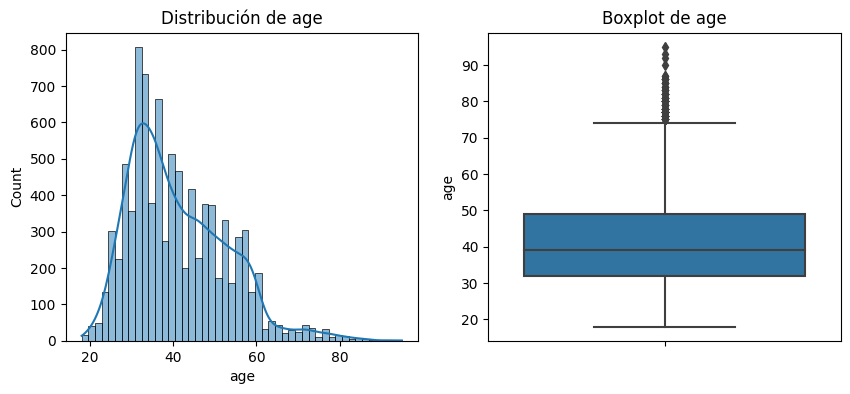

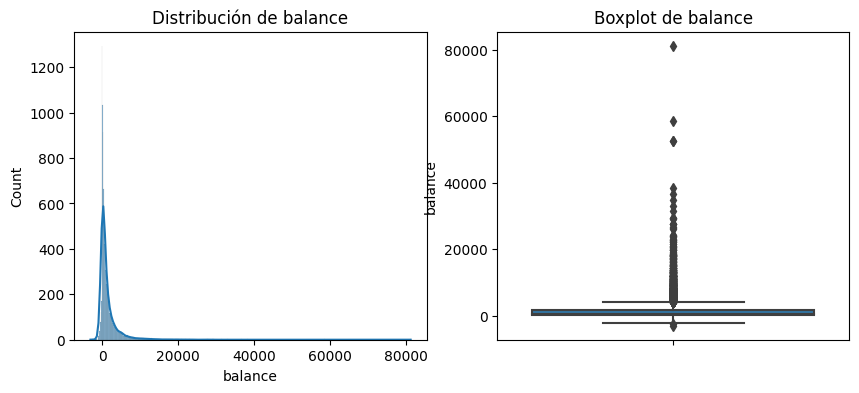

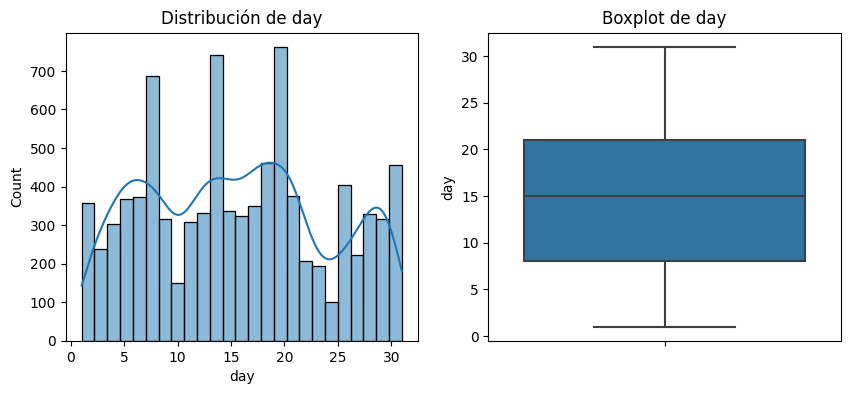

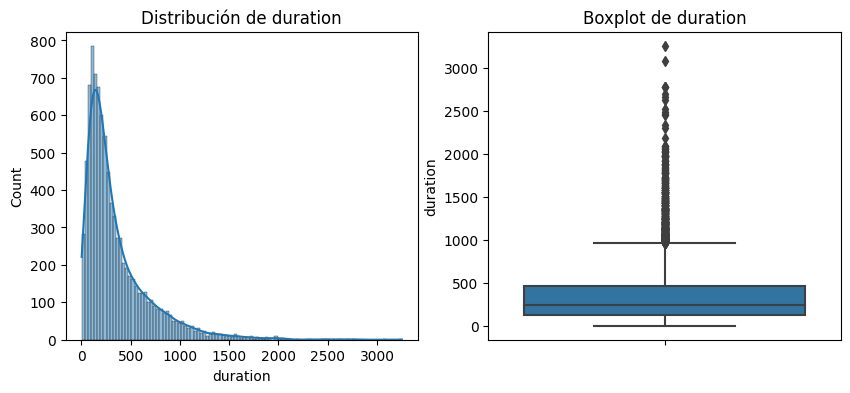

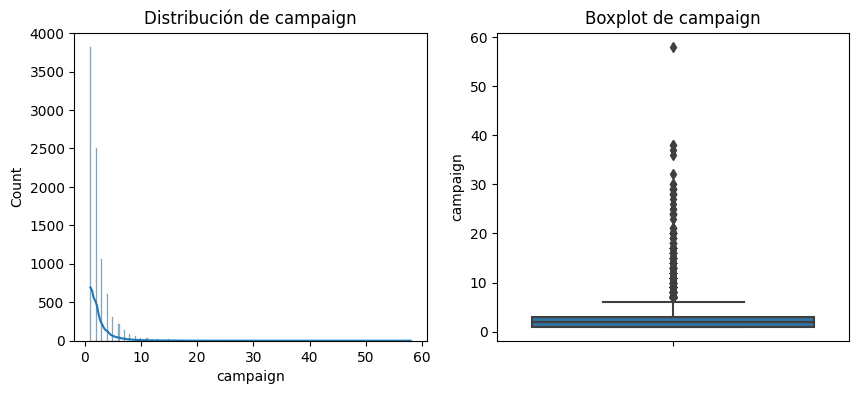

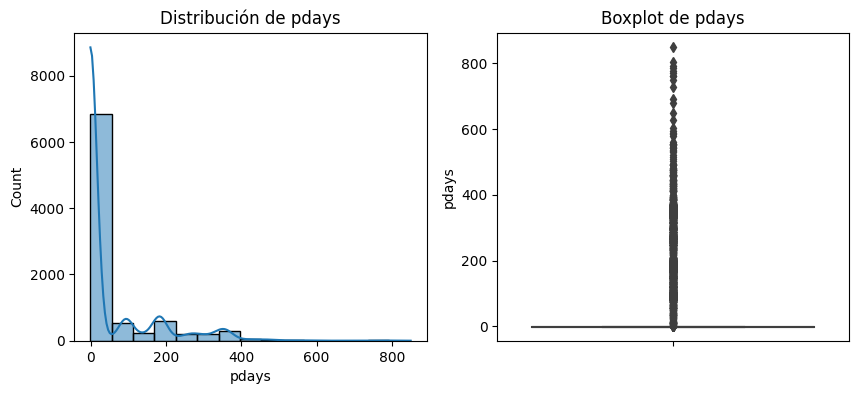

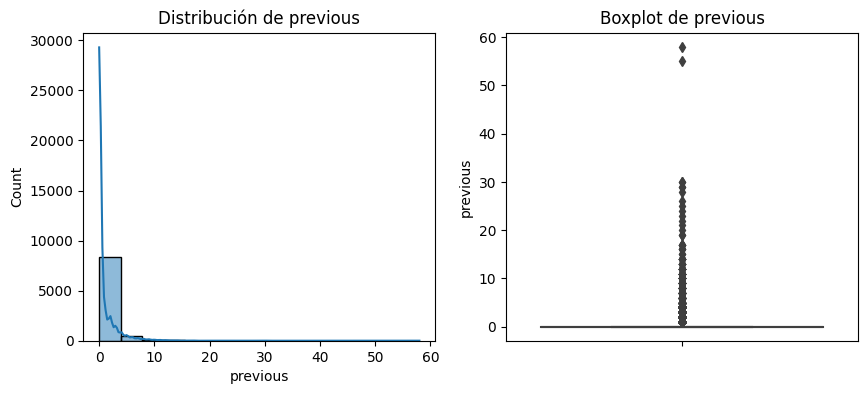

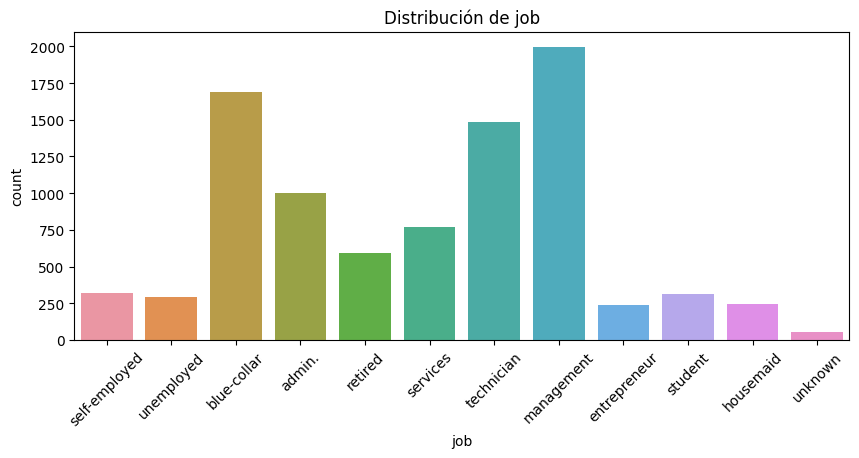

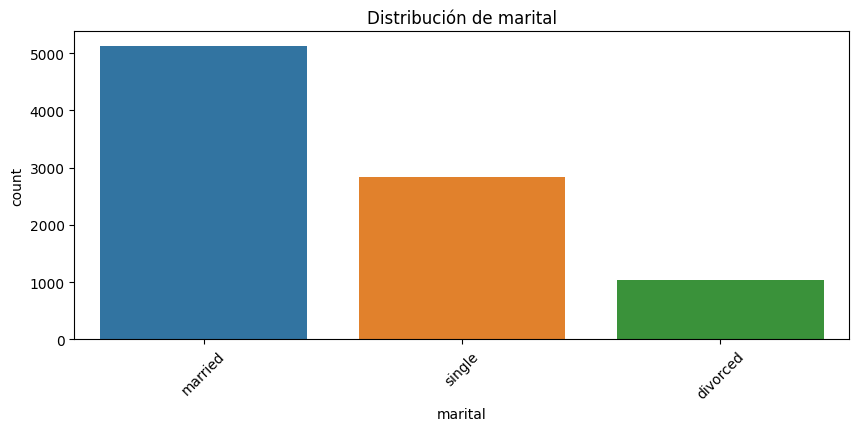

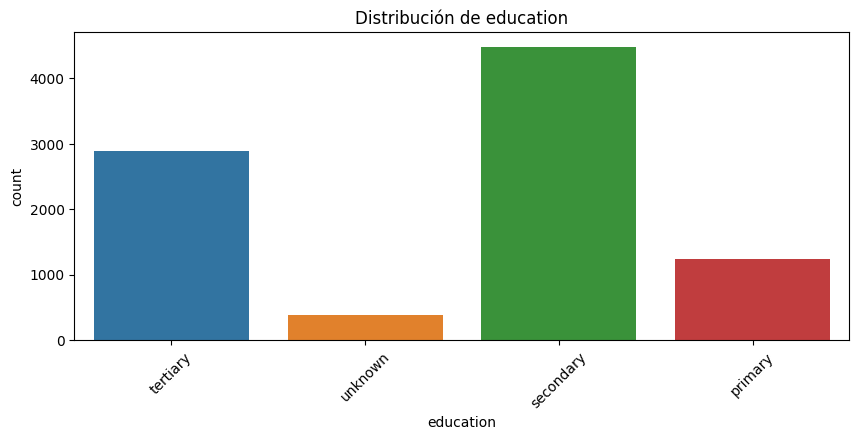

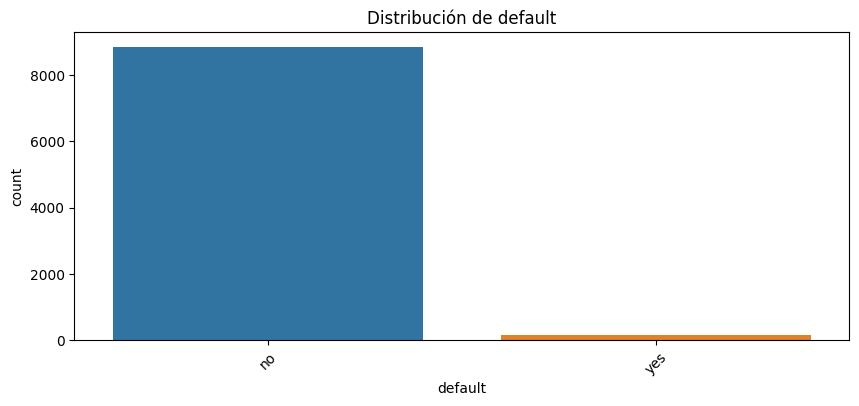

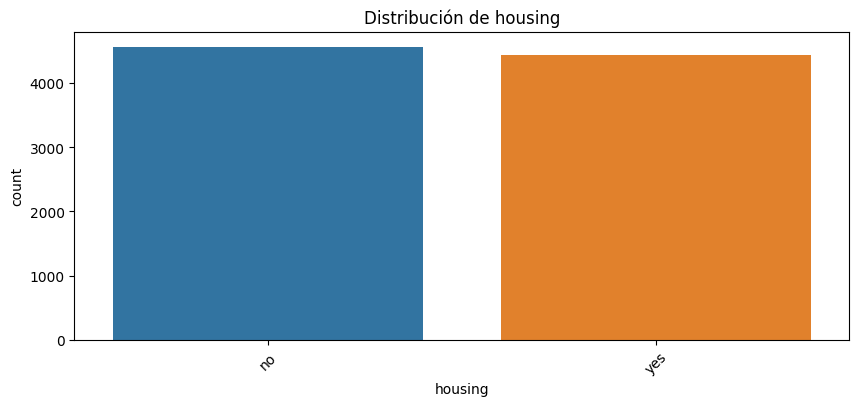

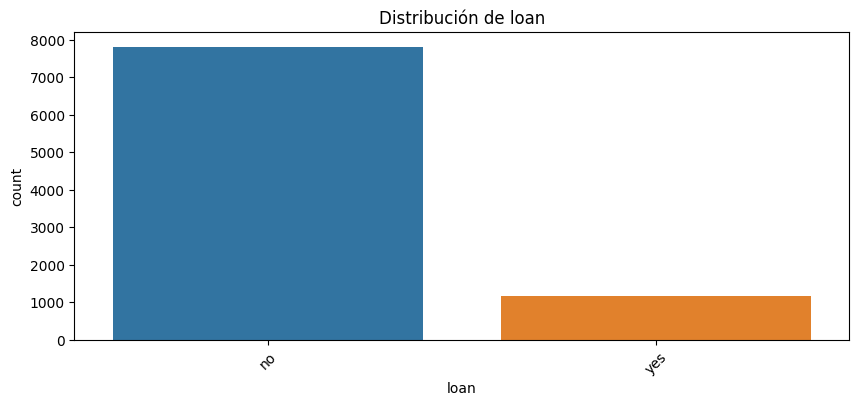

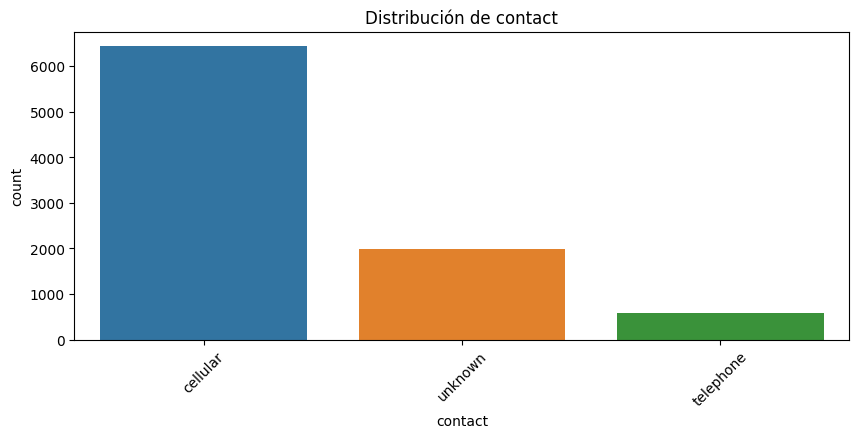

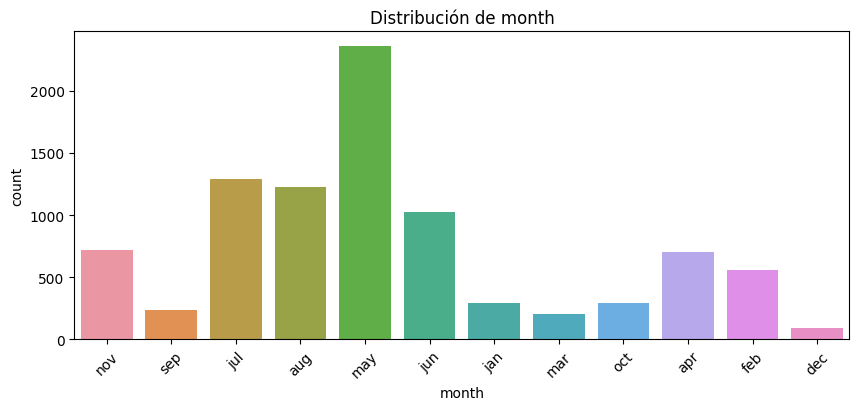

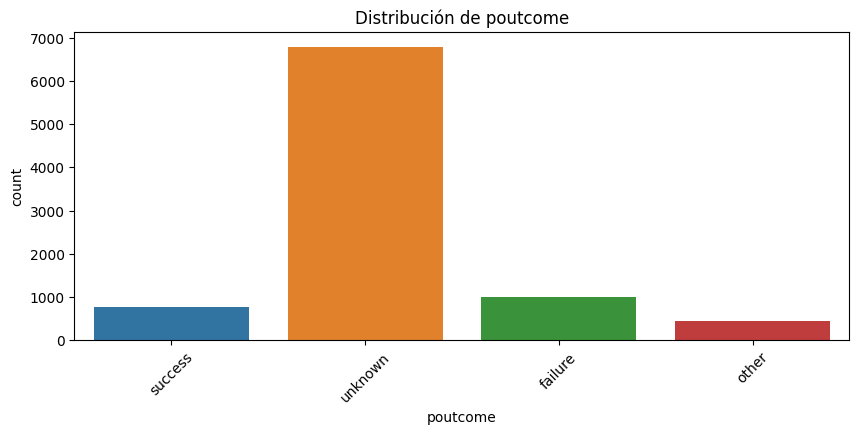

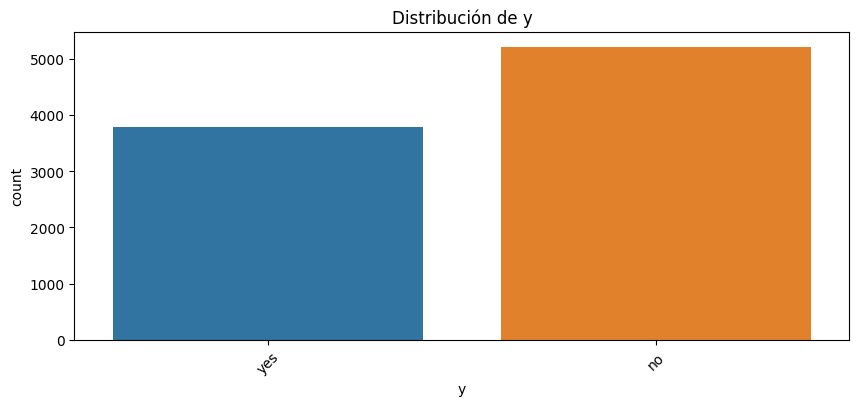

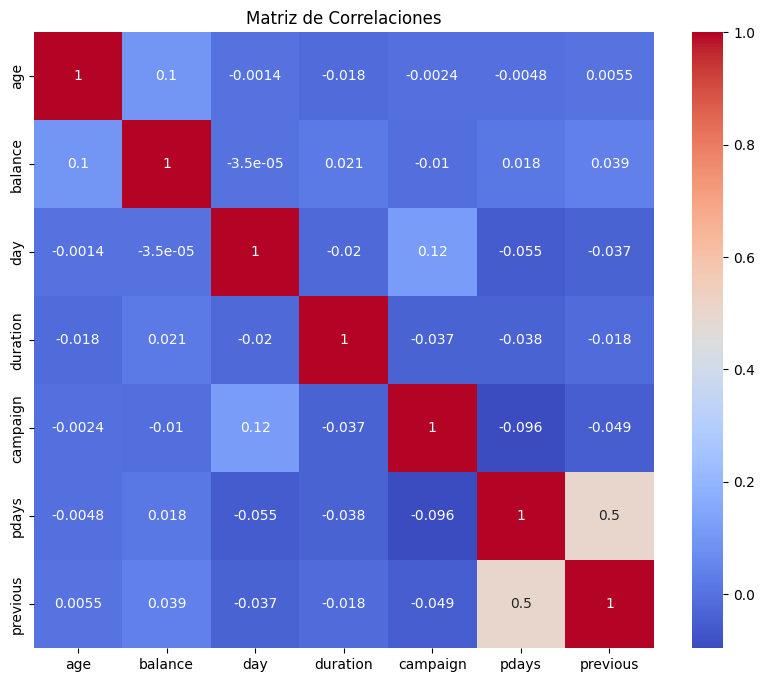

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '/content/bank_marketing_RETO_DS_AS.csv'
data = pd.read_csv(file_path)

# Análisis de variables numéricas
num_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print("Estadísticas Descriptivas de Variables Numéricas:")
print(data[num_vars].describe())

for var in num_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribución de {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

# Análisis de variables categóricas
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for var in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=data)
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()

# Matriz de correlaciones
corr_matrix = data[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


Las estadísticas descriptivas de las variables numéricas proporcionan información valiosa que puede ser interpretada en función de estrategias de marketing de la siguiente manera:

**Edad (age):** La edad promedio de los clientes en el conjunto de datos es de aproximadamente 41 años. Esto podría ayudar a segmentar a los clientes en grupos de edad para personalizar las estrategias de marketing. Por ejemplo, ciertos productos o promociones podrían dirigirse a grupos de edad específicos.

**Saldo bancario (balance):** El saldo bancario promedio es de alrededor de 1482 unidades monetarias. Esto podría utilizarse para definir umbrales para la segmentación de clientes, como clientes con saldos altos o bajos, y ofrecer productos o servicios adecuados.

**Día del último contacto (day):** Los días del último contacto varían entre 1 y 31. Esto podría relacionarse con la planificación de campañas de marketing en función de los días de la semana o del mes que son más efectivos para contactar a los clientes.

**Duración de la última llamada (duration):** La duración promedio de la última llamada es de aproximadamente 353 segundos (casi 6 minutos). Esto podría ayudar a determinar cuánto tiempo deben durar las llamadas de ventas o las interacciones con los clientes para tener un impacto positivo en la conversión.

**Número de contactos en la campaña actual (campaign):** El número promedio de contactos en la campaña actual es de alrededor de 2.5. Esto podría relacionarse con la eficacia de la campaña y si es necesario ajustar la frecuencia de los contactos.

**Días desde el último contacto (pdays):** La mayoría de los registros tienen un valor de -1 en esta variable, lo que indica que no se ha contactado al cliente antes. Esto podría ser útil para segmentar a los clientes en función de si se han contactado previamente o no.

**Número de contactos previos (previous):** El número promedio de contactos previos es de aproximadamente 0.79. Esto podría indicar la proporción de clientes que han tenido contactos previos con la empresa y cómo esto afecta a las conversiones.